# Доброго времени суток. Это ДЗ_1 по Системам хранения и обработки данных

Структура базы данных - Диаграмма из https://dbdiagram.io/:

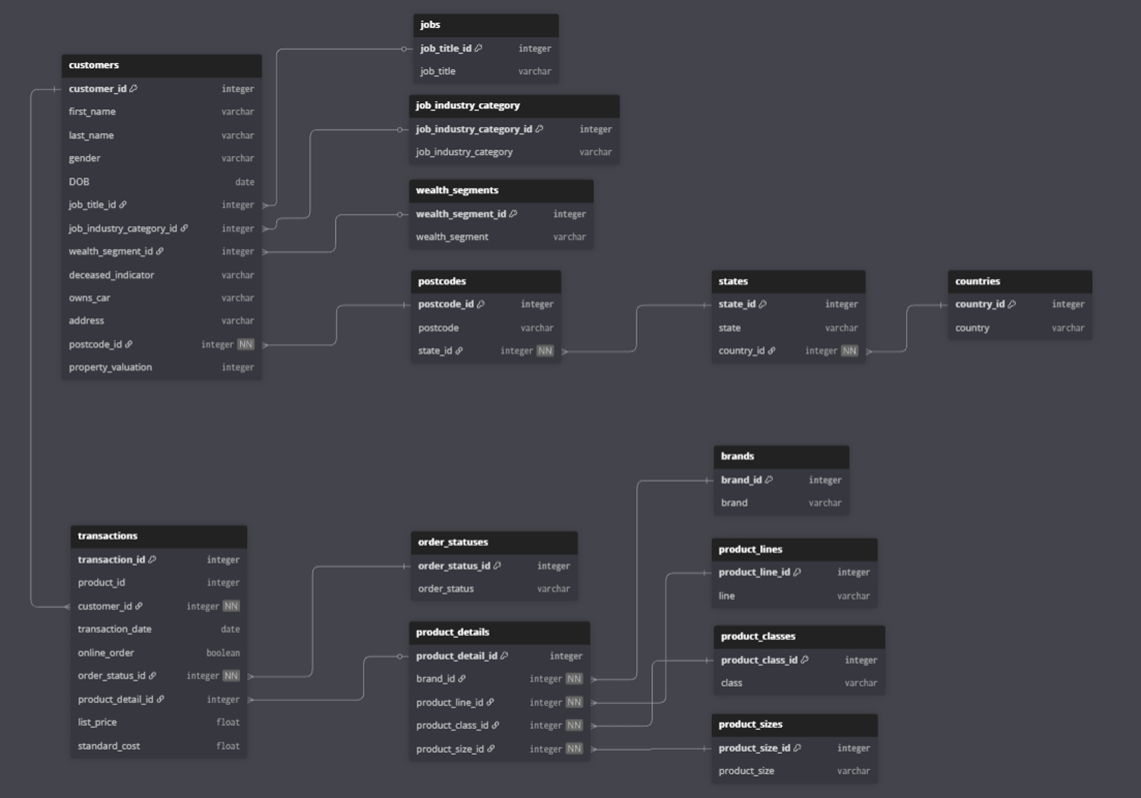

Таблица изначально находилась в 1НФ, так как в одной строке не было нескольких значений (атомарность атрибутов). 

При этом она не находилась во второй нормальной форме, так как имелись столбцы, которые не являлись ключом, но при этом полностью не зависили от первичного ключа и дублировались.

Например, в таблице transaction можно выделить brand | product_line | product_class | product_size в отдельную таблицу.
А в таблице Customers дублируются значения по wealth_segment, job_title, job_industry_category, postcode и всё с ним связанное.
При этом, так как я решил не устранять условно некорректные значения штатов (дублирование VIC и Victoria), у меня не получилось выделить postcode в отдельный ключ и пришлось создать суррогатный. Если это выполнить, необходимость в суррогатном ключе отпадёт.

В своём решении я частично пропустил 2НФ и сразу старался (по мере моей возможности) перевесть таблицу в 3НФ, выделяя все столбцы, которые не являются ключем, чтобы они зависили от первичного ключа:
Это включало, например, дальнейшее разделение product_details на дополнительные таблицы. Также это позволяет легко изменить название любого параметра, так как они минимально дублируются и передаются в дальнейшие таблицы ключами. 

Некоторые комментарии по процессу:
Вынести List_price и standart_cost в зависимость от продукта не получилось, цена менялась со временем. Оставил в текущем виде как зависимость от transaction_id, т.к. это поможет, если нужно будет смотреть динамику цен и т.д.
Выделять сочетания job_title и job_industry_category в отдельную общую таблицу не вижу смысла, функциональных зависимостий между ними мною не было найдено.

In [ ]:
##### Создал с помощью CREATE TABLE таблицы в DBeaver: #####
CREATE TABLE IF NOT EXISTS hw_1.transactions (
	transaction_id integer PRIMARY key,
	product_id integer,
	customer_id integer NOT NULL,
	transaction_date date,
	online_order boolean,
	order_status_id integer NOT NULL,
	product_detail_id integer,
	list_price float4,
	standard_cost float4
);

CREATE TABLE IF NOT EXISTS hw_1.order_statuses (
    order_status_id integer PRIMARY KEY,
    order_status VARCHAR(50) NOT NULL
);


CREATE TABLE IF NOT EXISTS hw_1.product_details (
    product_detail_id integer PRIMARY key,
    brand_id integer NOT NULL,
    product_line_id integer NOT NULL,
    product_class_id integer NOT NULL,
    product_size_id integer NOT NULL
);

CREATE TABLE IF NOT EXISTS hw_1.brands (
    brand_id integer PRIMARY key,
    brand VARCHAR(50) NOT NULL
);

CREATE TABLE IF NOT EXISTS hw_1.product_lines (
    product_line_id integer PRIMARY key,
    product_line VARCHAR(50) NOT NULL
);

CREATE TABLE IF NOT EXISTS hw_1.product_classes (
    product_class_id integer PRIMARY key,
    product_class VARCHAR(50) NOT NULL
);

CREATE TABLE IF NOT EXISTS hw_1.product_sizes (
    product_size_id integer PRIMARY key,
    product_size VARCHAR(50) NOT NULL
);

CREATE TABLE IF NOT EXISTS hw_1.customers (
	customer_id integer PRIMARY key,
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	gender VARCHAR(50),
	DOB date,
	job_title_id integer,
	job_industry_category_id integer,
	wealth_segment_id integer ,
	deceased_indicator VARCHAR(50),
	owns_car VARCHAR(50),
	address VARCHAR(50),
	postcode_id integer NOT NULL,
	property_valuation integer
);

CREATE TABLE IF NOT EXISTS hw_1.jobs (
	job_title_id integer PRIMARY key,
	job_title VARCHAR(50)
);
	
CREATE TABLE IF NOT EXISTS hw_1.job_industry_category (
	job_industry_category_id integer PRIMARY key,
	job_industry_category VARCHAR(50)
);	
	
CREATE TABLE IF NOT EXISTS hw_1.wealth_segments (
	wealth_segment_id integer PRIMARY key,
	wealth_segment VARCHAR(50)
);

CREATE TABLE IF NOT EXISTS hw_1.postcodes (
	postcode_id integer PRIMARY key,
	postcode VARCHAR(50),
	state_id integer NOT NULL
);	
	
CREATE TABLE IF NOT EXISTS hw_1.states (
	state_id integer PRIMARY key,
	state VARCHAR(50),
	country_id integer NOT NULL
);

	CREATE TABLE IF NOT EXISTS hw_1.countries (
	country_id integer PRIMARY key,
	country VARCHAR(50)
);		


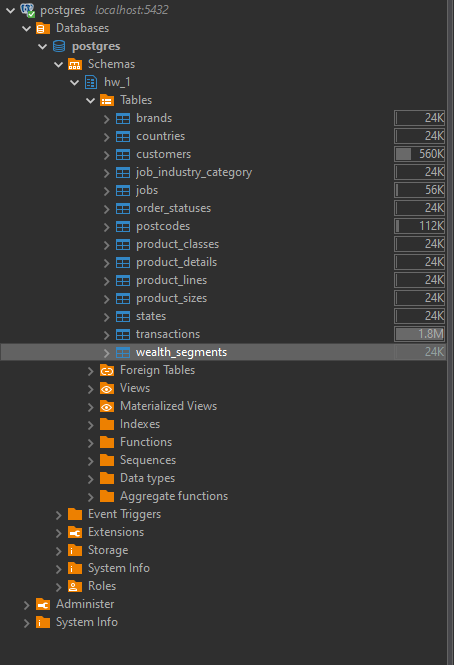

Провёл импорт данных в таблицы в полном объёме. Импортировал с помощью встроенных средств DBeaver пришлось в настройках импорта корректировать Null value mark для правильной обработки значений NULL, которые в изначальном файле называются по другому и Date/time format для корректной обработки дат.
Прикладываю скрины таблиц:


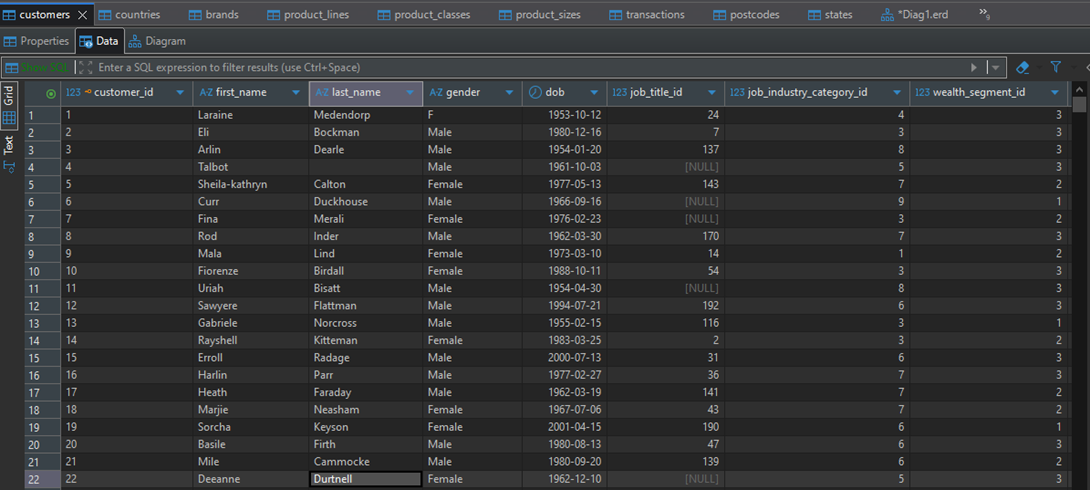

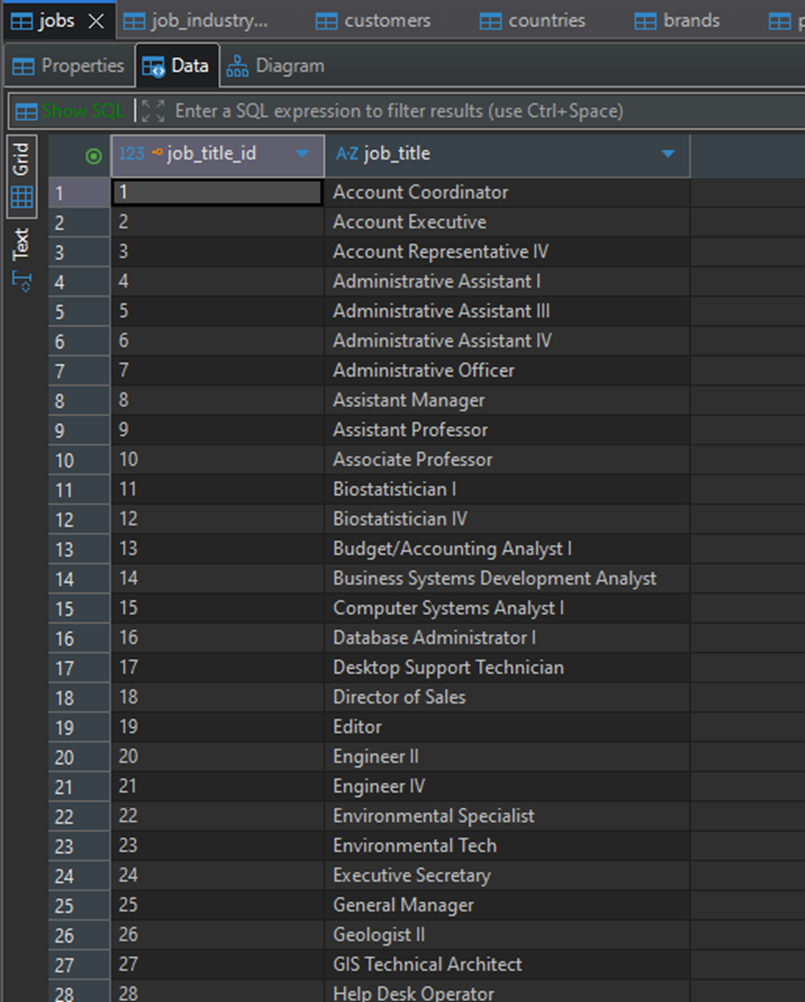

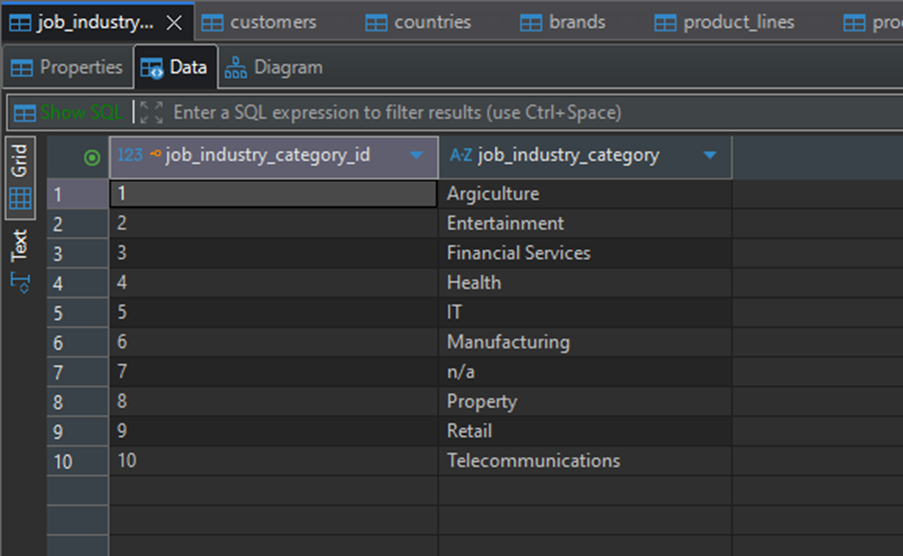

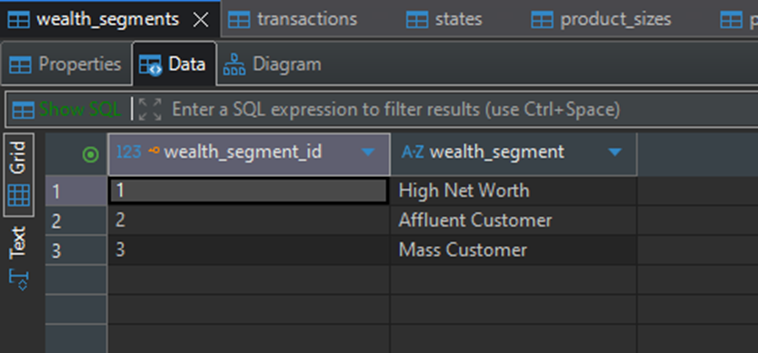

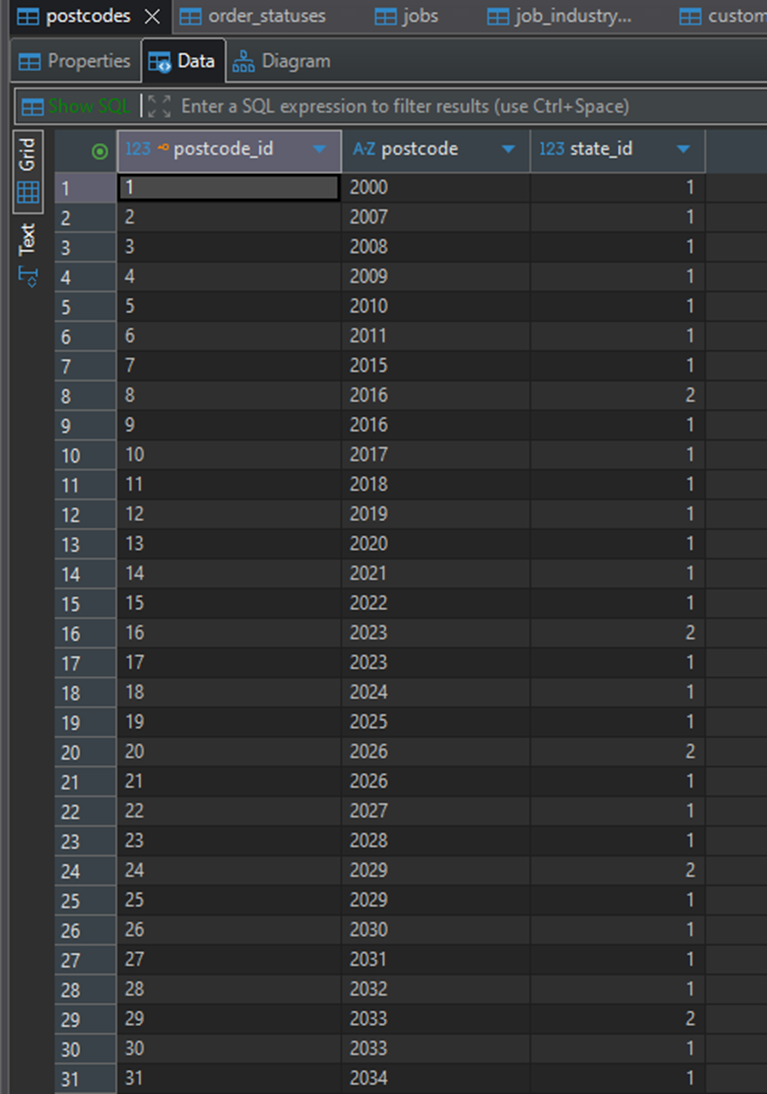

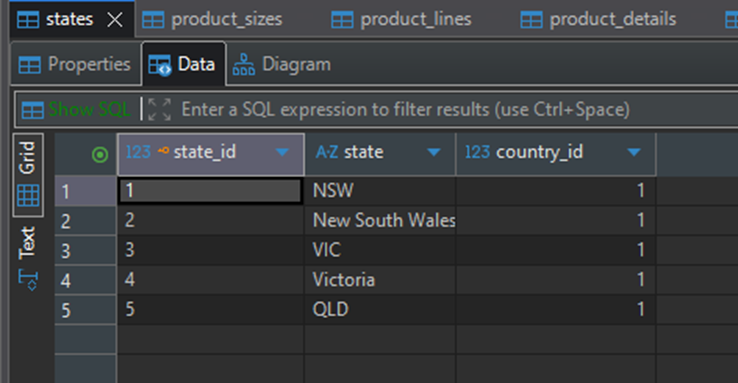

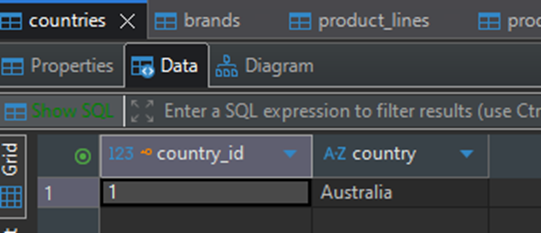

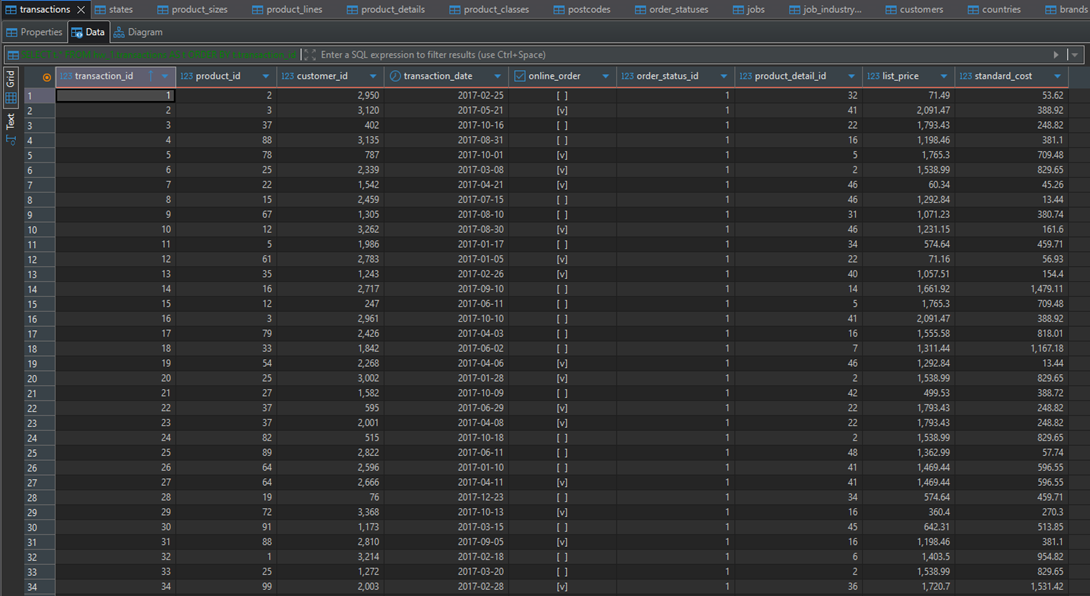

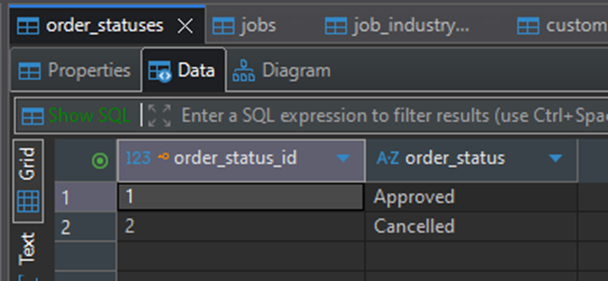

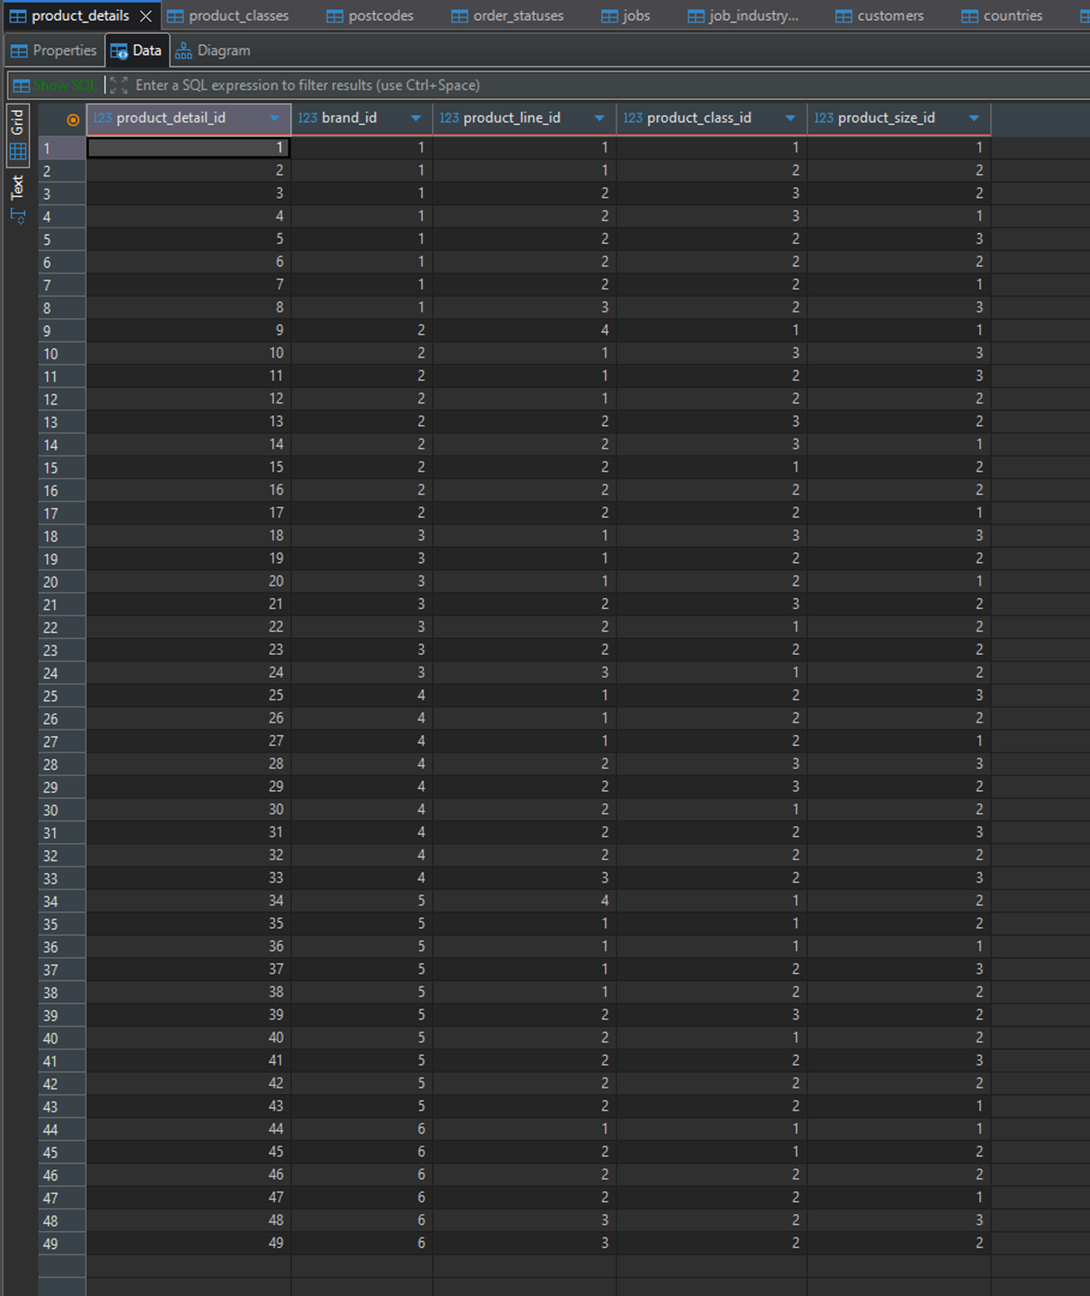

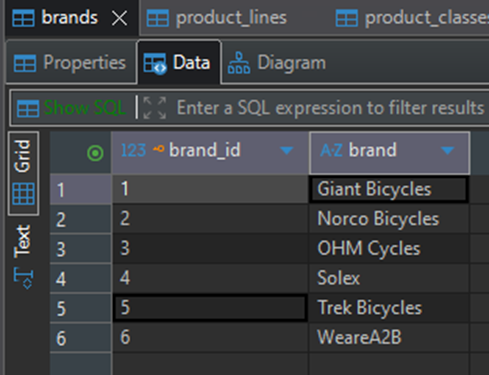

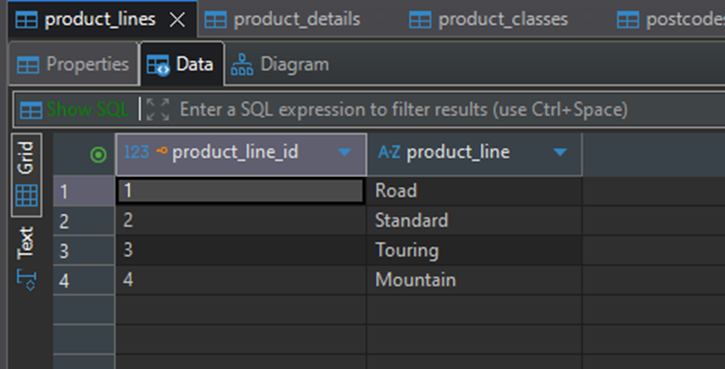

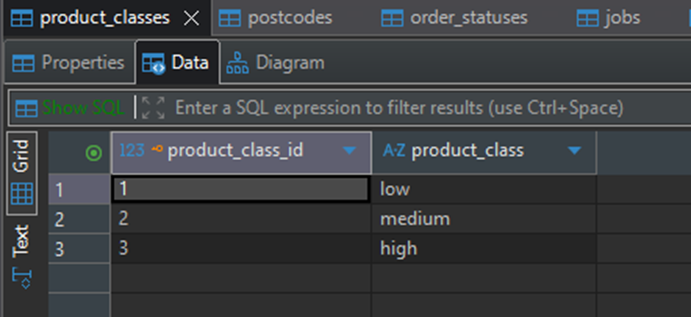

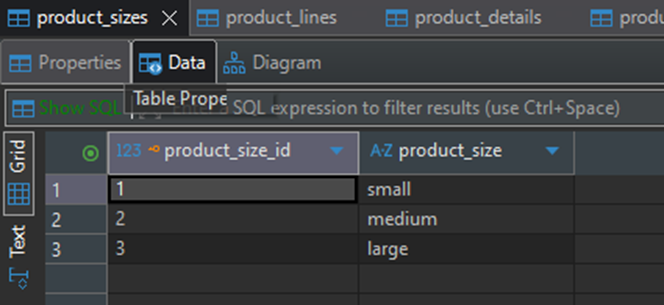

Вообще большую часть первоначальной работы, к сожалению, проводил в Excel, включая выделение таблиц и дальнейшее формирование CSV файлов. Их я тоже приложу.